In [1]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

2024-05-30 15:50:46.450067: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 15:50:46.450224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 15:50:46.571678: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/tomatoleaf/tomato/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 10000 files belonging to 10 classes.


In [3]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/tomatoleaf/tomato/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 1000 files belonging to 10 classes.


# Preview Data****

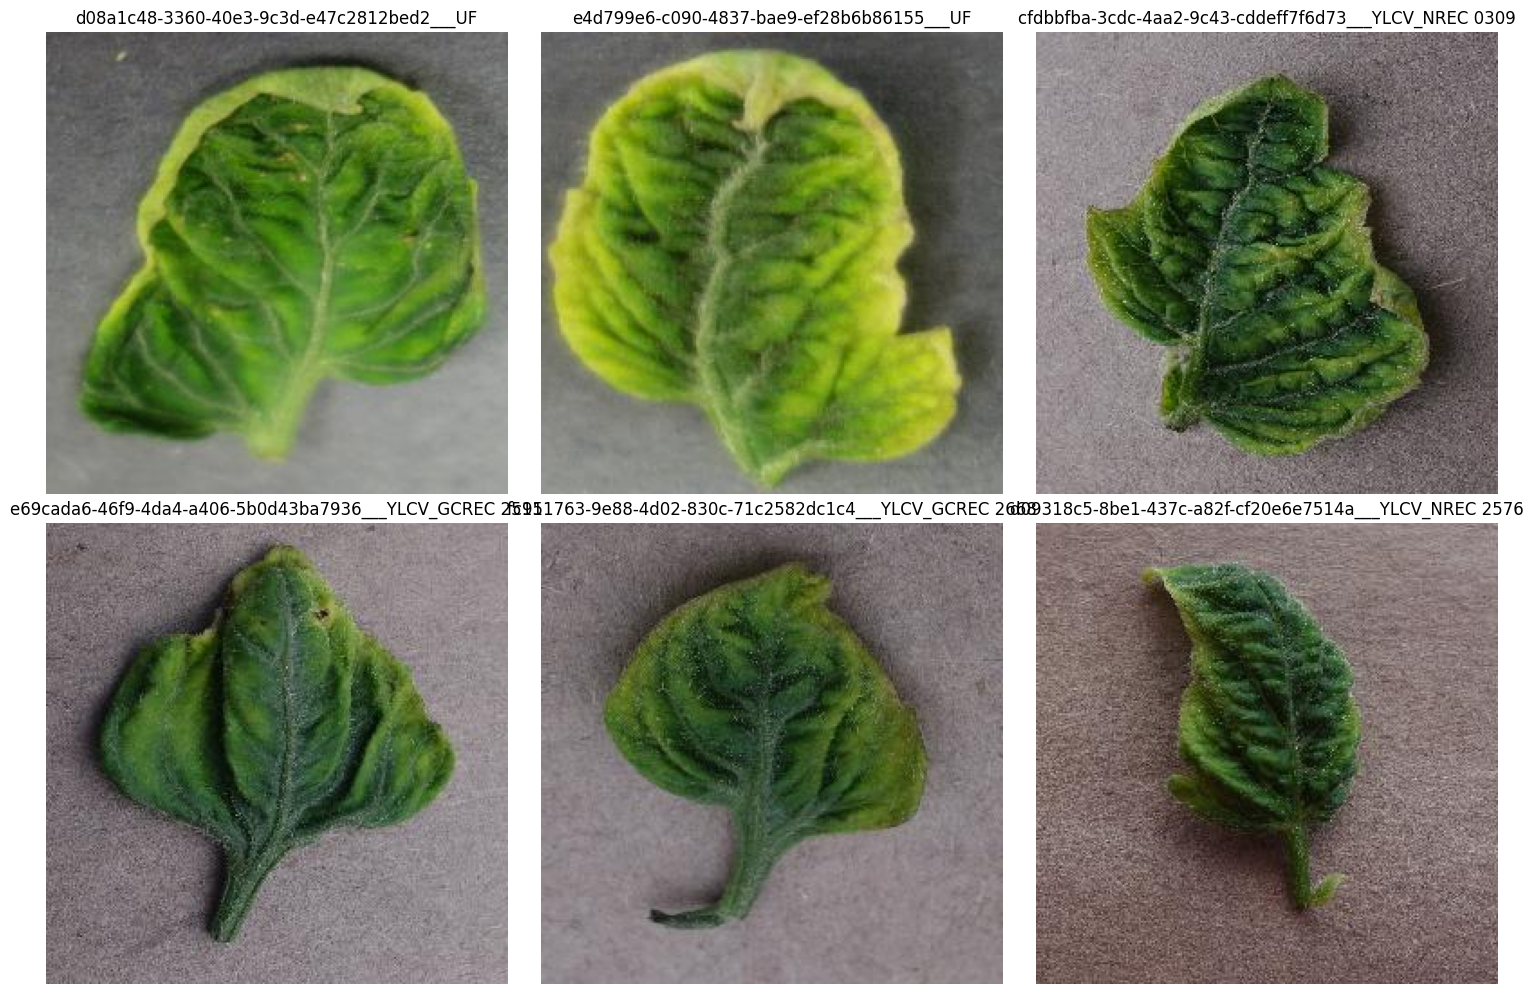

In [4]:
# Path to the directory containing images
path = "/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

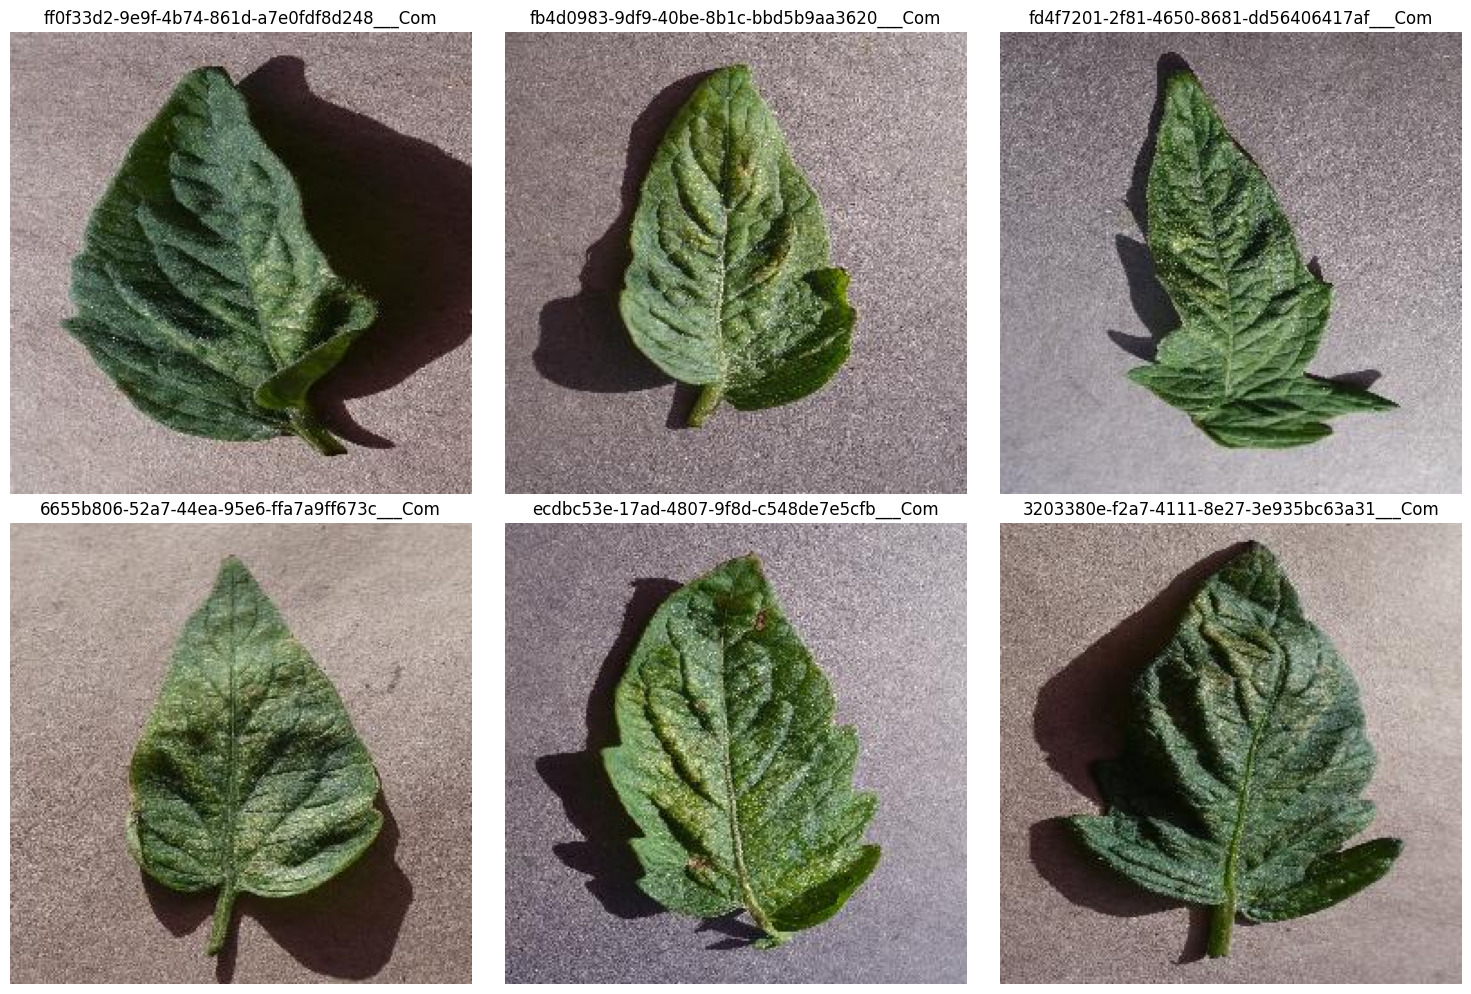

In [5]:
# Path to the directory containing images
path = "/kaggle/input/tomatoleaf/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

In [6]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
conv_base.trainable = False

In [9]:
# # Summary of the pretrained model
#conv_base.summary()

In [10]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [13]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[EarlyStopping(patience=0)])

Epoch 1/100
  1/313 ━━━━━━━━━━━━━━━━━━━━ 3:31:36 41s/step - accuracy: 0.0938 - loss: 3.0149

I0000 00:00:1717084877.447357     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717084877.514322     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.3029 - loss: 2.0625

W0000 00:00:1717084926.200805     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717084936.539383     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 117s 243ms/step - accuracy: 0.3035 - loss: 2.0608 - val_accuracy: 0.7850 - val_loss: 0.9043
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.7463 - loss: 0.8111 - val_accuracy: 0.8530 - val_loss: 0.5156
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.8302 - loss: 0.5439 - val_accuracy: 0.8760 - val_loss: 0.3932
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.8630 - loss: 0.4360 - val_accuracy: 0.9000 - val_loss: 0.3294
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.8973 - loss: 0.3284 - val_accuracy: 0.9080 - val_loss: 0.2905
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.9101 - loss: 0.2784 - val_accuracy: 0.9210 - val_loss: 0.2593
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.9239 - loss: 0.2403 - val_accuracy: 0.9260 - val_loss: 0.2394
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.9337 - loss: 0.20

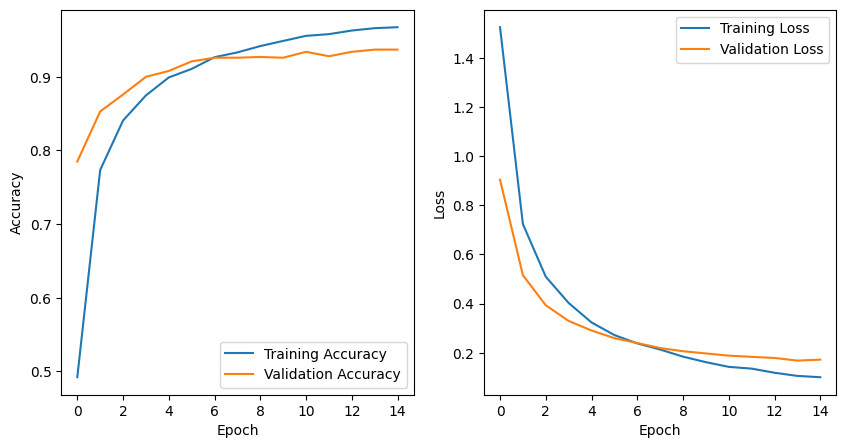

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9320 - loss: 0.1910
Validation Loss: 0.1717464178800583
Validation Accuracy: 0.9369999766349792


In [25]:
import numpy as np
from keras.preprocessing import image

# Path ke gambar yang ingin diprediksi
image_path = '/kaggle/input/tomatoleaf/tomato/train/Tomato___Leaf_Mold/0160c3b5-d89e-40e5-a313-49ae1524040a___Crnl_L.Mold 6823.JPG'  

# Fungsi untuk memuat dan memproses gambar
def load_and_process_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256))  # Memuat gambar dan mengubah ukuran ke (256, 256)
    img_array = image.img_to_array(img)  # Mengonversi gambar ke array numpy
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi tambahan sebagai batch
    img_array /= 255.0  # Normalisasi gambar
    return img_array

# Melakukan prediksi
processed_image = load_and_process_image(image_path)
predictions = model.predict(processed_image)

# Dictionary untuk mapping antara indeks kelas dan nama kelas
class_names = {
    0: "Tomato___Bacterial_spot",
    1: "Tomato___Early_blight",
    2: "Tomato___Late_blight",
    3: "Tomato___Leaf_Mold",
    4: "Tomato___Septoria_leaf_spot",
    5: "Tomato___Spider_mites Two-spotted_spider_mite",
    6: "Tomato___Target_Spot",
    7: "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    8: "Tomato___Tomato_mosaic_virus",
    9: "Tomato___healthy",
    # Tambahkan kelas lainnya sesuai dengan jumlah kelas Anda
}

# Mengambil label kelas dengan nilai probabilitas tertinggi
predicted_class = np.argmax(predictions)

# Mengambil nama kelas berdasarkan indeks yang diprediksi
predicted_class_name = class_names[predicted_class]

# Menampilkan hasil prediksi
print("Prediksi kelas:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediksi kelas: Tomato___Leaf_Mold


In [30]:
# Simpan model ke dalam file H5
model.save('totomatsik.h5')


ValueError: Unable to synchronously create dataset (name already exists)